In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Initializing
total_cost_multi = [0, 1, 2, 3, 4, 5, 6]
total_carbon_multi = [0, 1, 2, 3, 4, 5, 6]
retrofit_scenario_multi = [0, 1, 2, 3, 4, 5, 6]
chosen_retrofit_scenario_multi = [0, 0, 0, 0, 0, 0, 0]
total_cost_costmin = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
total_cost_costmin_2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
total_carbon_costmin = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
retrofit_scenario_costmin = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
chosen_retrofit_scenario_costmin = [0, 0, 0, 0, 0, 0, 0, 0, 0,0]
chosen_retrofit_scenario_costmin_2 = [0, 0, 0, 0, 0, 0, 0, 0, 0,0]
number_of_scenarios = 10

In [3]:
## Multi-objective optimization
# Extract total cost
for j in range(7):
    name = "multi_obj_" + str(j+1) + ".xlsx"
    total_cost_multi[j] = pd.read_excel(
    name,
    usecols="B",
    header=0,
    nrows=1,
    skiprows=0,
    sheet_name="Total_cost",
    )  # Read from some Excel/.csv file
    total_cost_multi[j]=total_cost_multi[j].iloc[0]["Value"]

# Extract total carbon
for k in range(7):
    name = "multi_obj_" + str(k+1) + ".xlsx"
    total_carbon_multi[k] = pd.read_excel(
    name,
    usecols="B",
    header=0,
    nrows=1,
    skiprows=0,
    sheet_name="Total_carbon",
    )  # Read from some Excel/.csv file
    total_carbon_multi[k]=total_carbon_multi[k].iloc[0]["Value"]


# Extract used retrofit scenarios
for m in range(7):
    name = "multi_obj_" + str(m+1) + ".xlsx"
    retrofit_scenario_multi[m] = pd.read_excel(
    name,
    usecols=[0,1],
    header=0,
    sheet_name="y_retrofit",
    )  # Read from some Excel/.csv file
    #print(retrofit_scenario_multi)
    for l in range(number_of_scenarios-1):
        if retrofit_scenario_multi[m].iloc[l]["Value"] == 1:
           chosen_retrofit_scenario_multi[m]= retrofit_scenario_multi[m].iloc[l][0]

print(chosen_retrofit_scenario_multi)
print(total_carbon_multi)
print(total_cost_multi)

# Plot pareto curve for multi objective optimization
plt.plot(total_carbon_multi, total_cost_multi, marker='o')
plt.xlabel('Total CO2 emissions [kg CO2 eq]')

plt.ylabel('Total system costs [CHF]')
plt.suptitle('Pareto curve of the multi-objective optimization')
plt.savefig('pareto.png')
plt.show()

       

FileNotFoundError: [Errno 2] No such file or directory: 'multi_obj_1.xlsx'

In [6]:
# Arrange data in descending order
def extract_suffix(scenario_name: str) -> str:
    return scenario_name[-2:]

def sort_scenarios(chosen_retrofit_scenario_costmin, total_cost_costmin):
    scenario_tuples = zip(chosen_retrofit_scenario_costmin.copy(), total_cost_costmin.copy())
    sorted_scenario_tuples = sorted(
        scenario_tuples,
        key=lambda scenario_tuple: (extract_suffix(scenario_tuple[0]), -scenario_tuple[1])
    )
    chosen_retrofit_scenario_costmin, total_cost_costmin = zip(*sorted_scenario_tuples)
    return [x for x in chosen_retrofit_scenario_costmin], [x for x in total_cost_costmin]

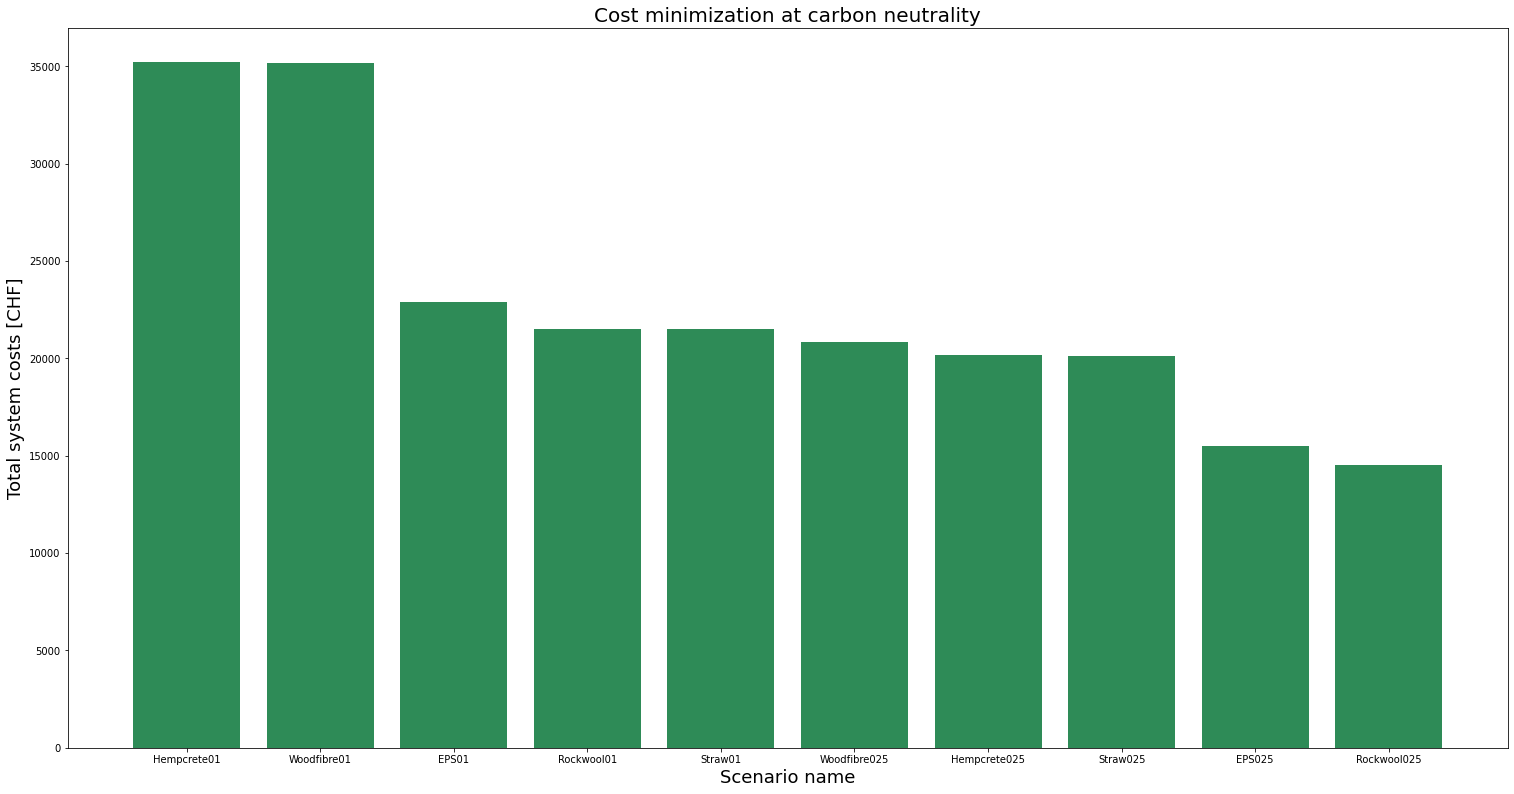

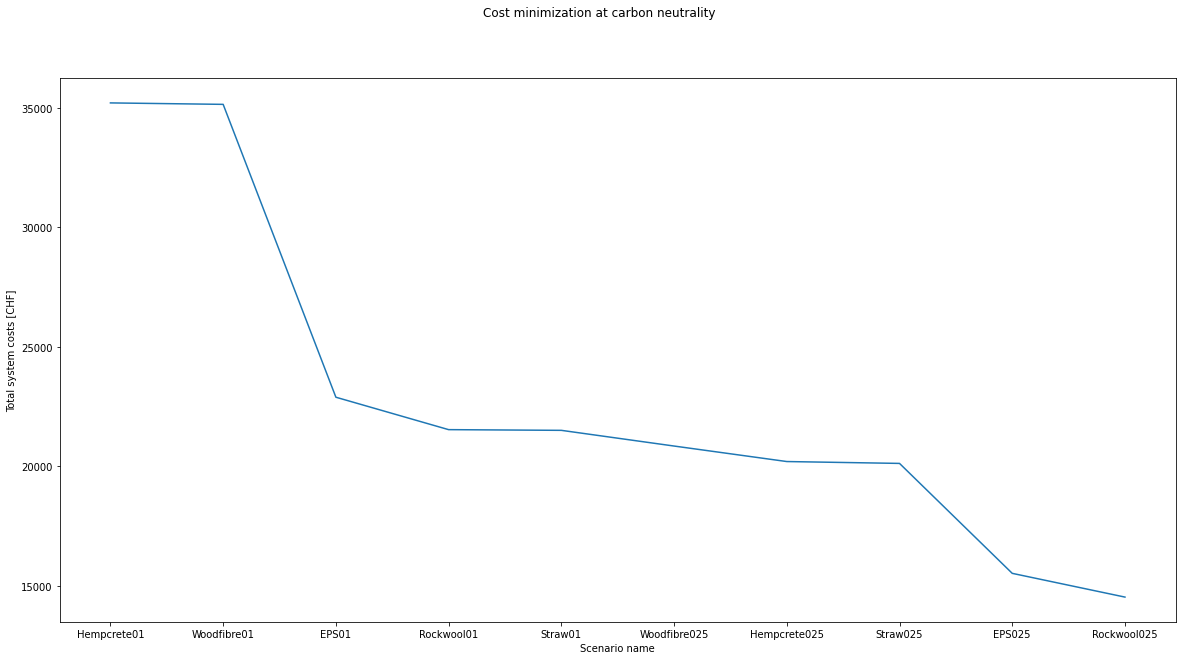

In [8]:
## Cost minimization at carbon neutrality
# Extract total cost
for j in range(number_of_scenarios):
    name = "cost_min_scenario_" + str(j) + ".xlsx"
    total_cost_costmin[j] = pd.read_excel(
        name,
        usecols="B",
        header=0,
        nrows=1,
        skiprows=0,
        sheet_name="Total_cost",
    )  # Read from some Excel/.csv file
    total_cost_costmin[j]=total_cost_costmin[j].iloc[0]["Value"]

# Extract total carbon
for k in range(number_of_scenarios):
    name = "cost_min_scenario_" + str(k) + ".xlsx"
    total_carbon_costmin[k] = pd.read_excel(
        name,
        usecols="B",
        header=0,
        nrows=1,
        skiprows=0,
        sheet_name="Total_carbon",
    )  # Read from some Excel/.csv file
    total_carbon_costmin[k]=total_carbon_costmin[k].iloc[0]["Value"]

# Extract used retrofit scenarios
for m in range(number_of_scenarios):
    name = "cost_min_scenario_" + str(m) + ".xlsx"
    retrofit_scenario_costmin[m] = pd.read_excel(
        name,
        usecols=[0,1],
        header=0,
        sheet_name="y_retrofit",
    ) 
    for l in range(number_of_scenarios):
        if retrofit_scenario_costmin[m].iloc[l]["Value"] == 1:
           chosen_retrofit_scenario_costmin[m]= retrofit_scenario_costmin[m].iloc[l][0]


chosen_retrofit_scenario_costmin, total_cost_costmin = sort_scenarios(chosen_retrofit_scenario_costmin, total_cost_costmin)


fig_costmin= plt.figure(figsize=(20,10))
ax = fig_costmin.add_axes([0,0,1,1])
ax_element_econ = ax.bar(chosen_retrofit_scenario_costmin,total_cost_costmin,color='seagreen')
ax.set_xlabel('Scenario name', fontsize=18)
ax.set_ylabel('Total system costs [CHF]',fontsize=18)
plt.xticks(rotation=90)
ax.set_title('Cost minimization at carbon neutrality',fontsize=20)
plt.savefig('cost_min.png',bbox_inches='tight')
plt.show()

plt.figure(figsize=(20,10))
plt.plot(chosen_retrofit_scenario_costmin,total_cost_costmin)
plt.xlabel('Scenario name')
plt.ylabel('Total system costs [CHF]')
plt.suptitle('Cost minimization at carbon neutrality')
plt.show()




In [ ]:
## Focus on one (e.g. most cost efficient) scenario
# Parameters, constant for all scenarios
conditioned_area = 735.09
crf_tech = 0.101852209
crf_insulation = 0.083860162

cost_import_elec = 791.6987174
cost_import_others = 1830.671404
cost_export_elec = -1819.467308
embodied_import_elec = 556.8258625
embodied_import_others = 2613.600055
embodied_export_elec = -1706.336

# Extract values from one specific scenario to be analysed
cost_conv1 = 26120.90801*crf_tech
embodied_conv1 = 680.750333/20
cost_pv = 22573.97638*crf_tech
embodied_pv = 11957.82609/20
cost_tes = 2655.961705*crf_tech
embodied_tes = 382.0400011/20
cost_battery = 24089.70137*crf_tech
embodied_battery = 16093.9707/20

cost_insulation = 63749.453432*crf_insulation
embodied_insulation = 6798.1562220000005/40


total_embodied =embodied_conv1+embodied_pv+embodied_import_elec+embodied_import_others+embodied_export_elec+embodied_tes+embodied_battery+embodied_insulation
total_cost = cost_certificates + cost_import_elec + cost_import_others + cost_export_elec + cost_pv + cost_insulation + cost_conv1+cost_tes+cost_battery

1089.7731792549998
13904.128713098575


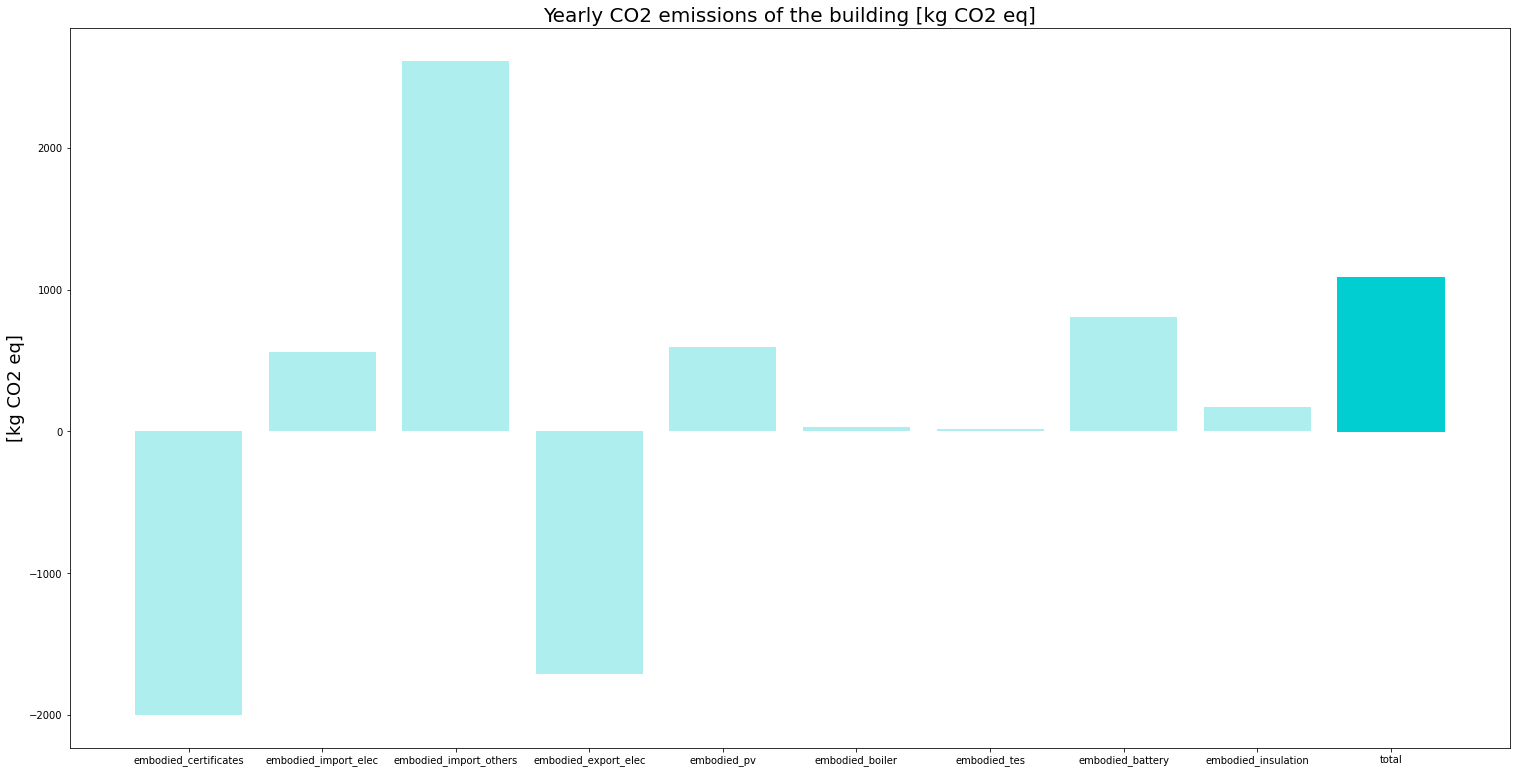

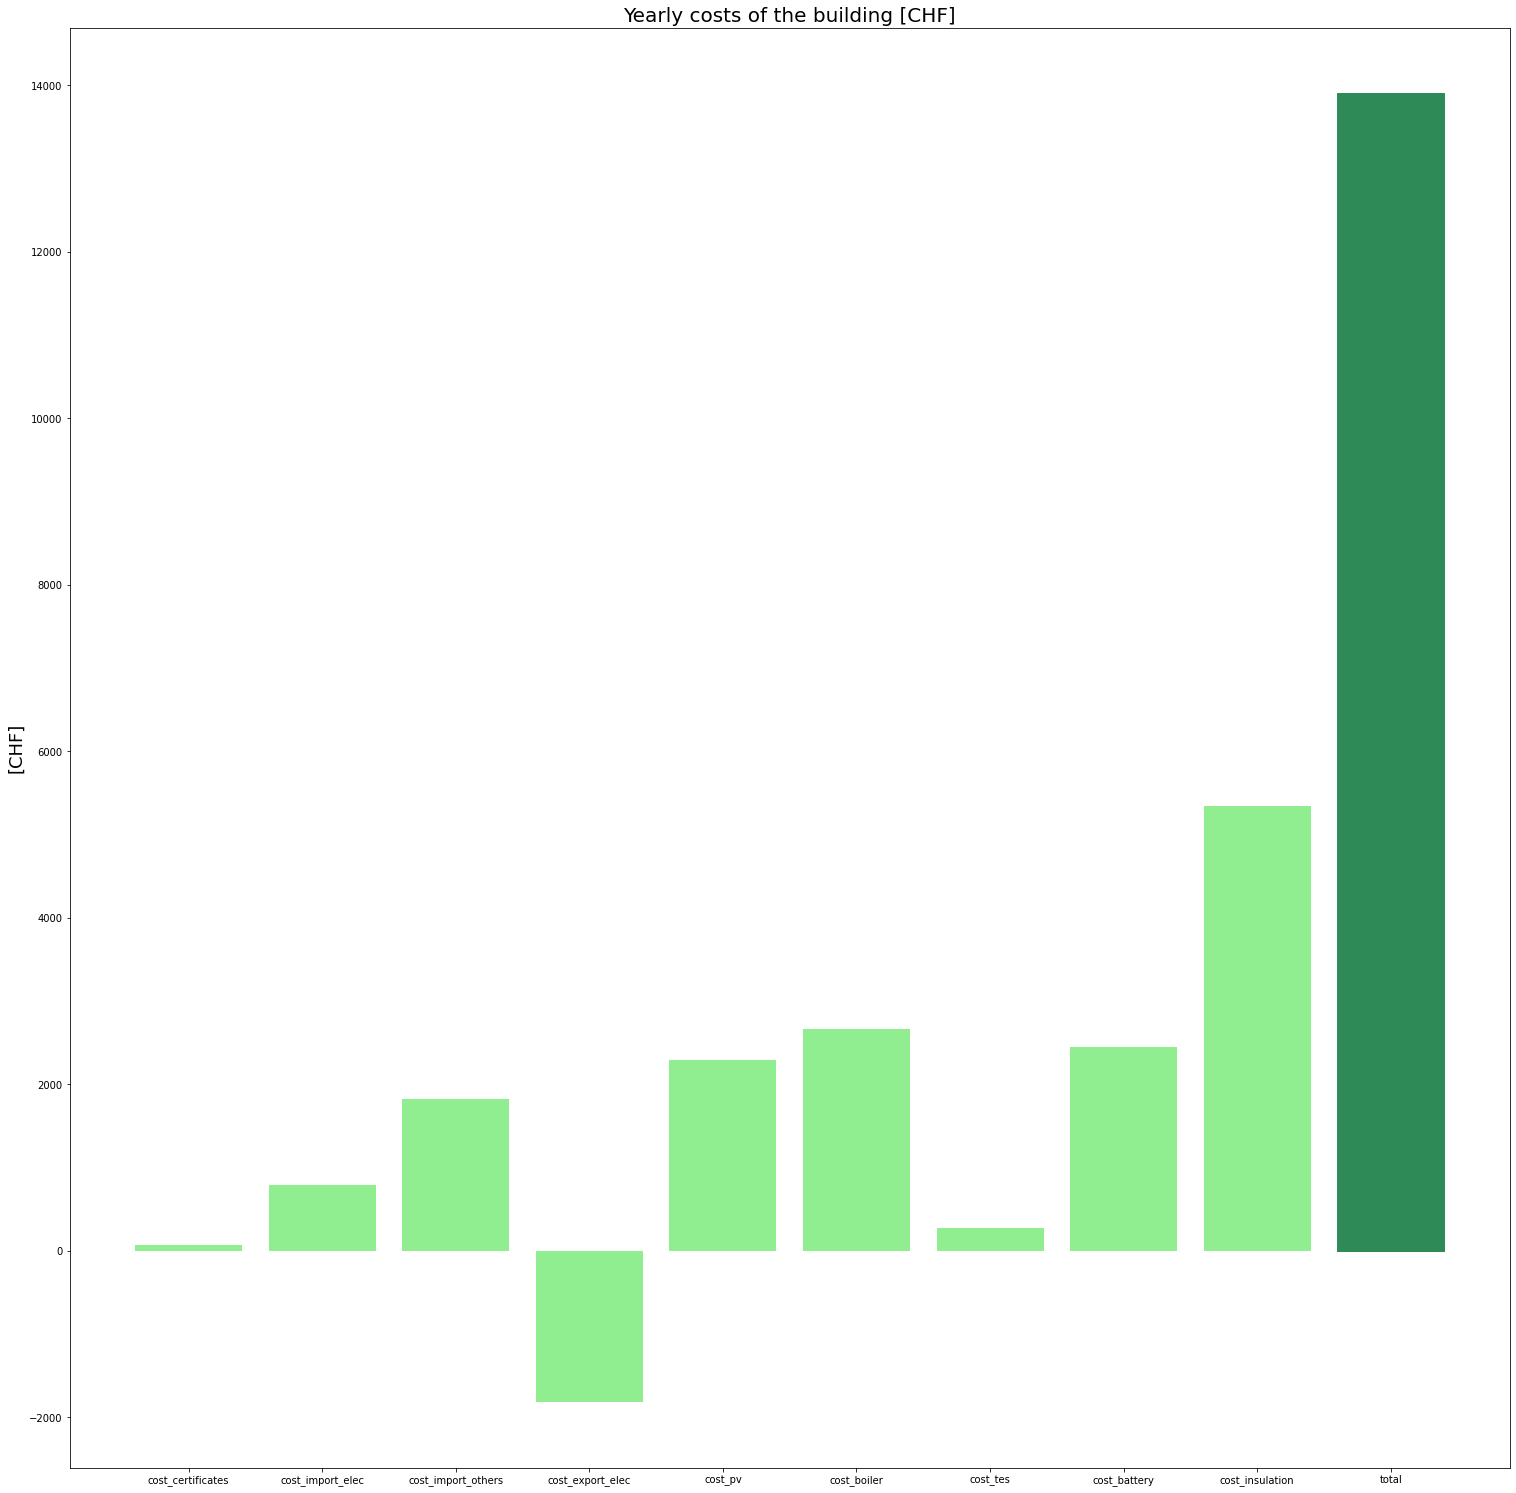

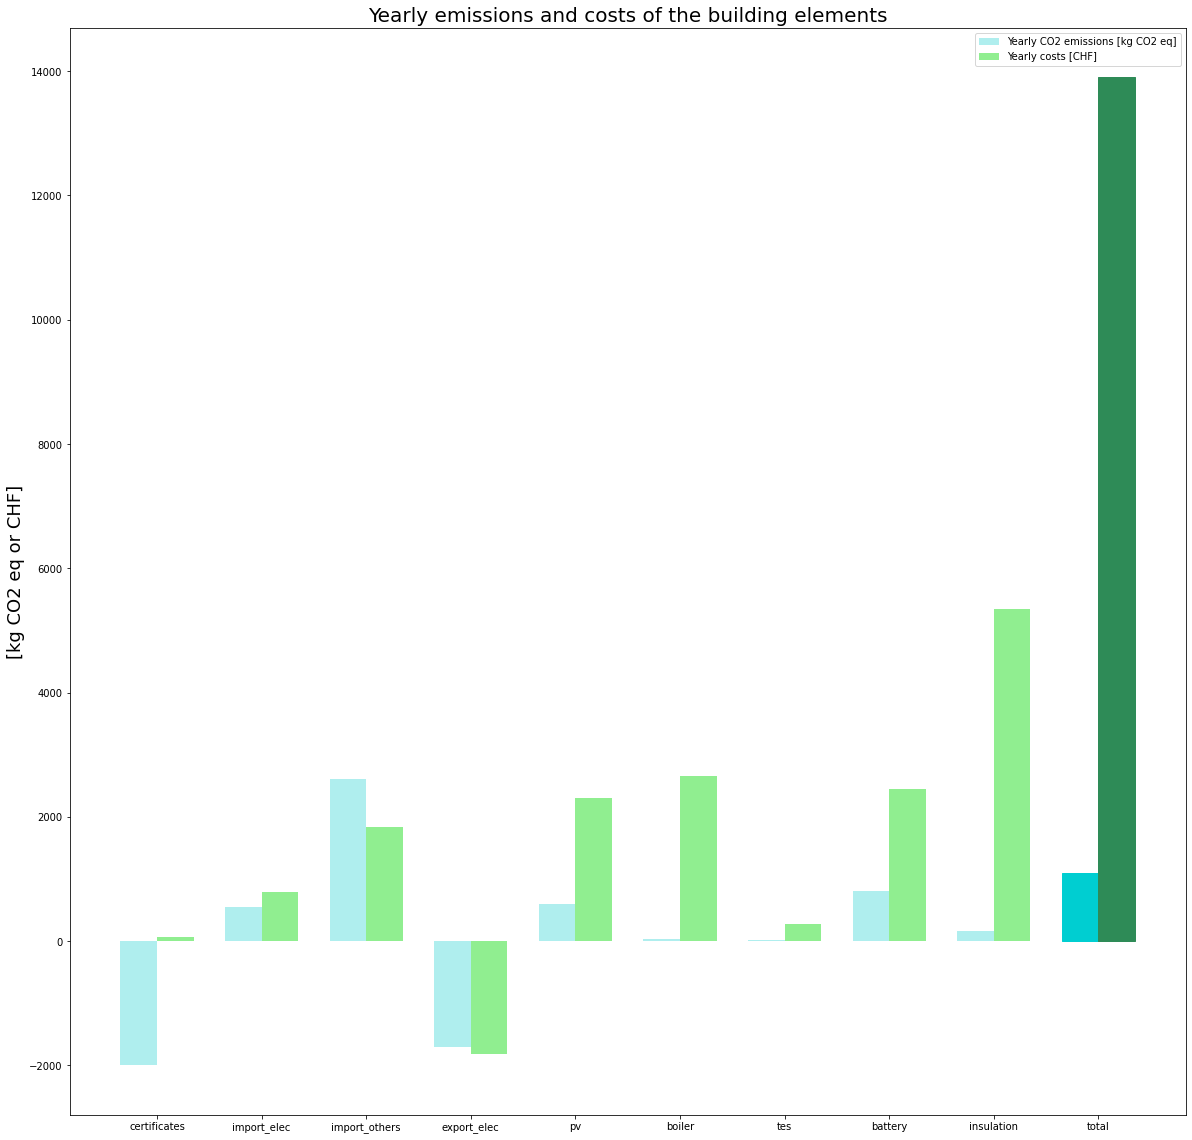

['cost_certificates', 'cost_import_elec', 'cost_import_others', 'cost_export_elec', 'cost_pv', 'cost_boiler', 'cost_tes', 'cost_battery', 'cost_insulation', 'total']
[-2000, 556.8258625, 2613.600055, -1706.336, 597.8913045, 34.03751665, 19.102000054999998, 804.698535, 169.95390555, 1089.7731792549998]
[71.4, 791.6987174, 1830.671404, -1819.467308, 2299.2093602168234, 2660.472181904294, 270.51556667365634, 2453.589298684826, 5346.039492218976, 13904.128713098575]


In [ ]:
# Environemntal costs plot
fig_embodied = plt.figure(figsize=(20,10))
ax = fig_embodied.add_axes([0,0,1,1])
element_name = ['embodied_certificates', 'embodied_import_elec', 'embodied_import_others', 'embodied_export_elec', 'embodied_pv', 'embodied_boiler','embodied_tes','embodied_battery','embodied_insulation','total']
embodied_element = [embodied_certificates, embodied_import_elec, embodied_import_others,embodied_export_elec, embodied_pv,embodied_boiler,embodied_tes,embodied_battery,embodied_insulation, total_embodied]
ax_element_envi = ax.bar(element_name,embodied_element, color='paleturquoise')
ax.set_ylabel('[kg CO2 eq]',fontsize=18)
ax_element_envi[9].set_color('darkturquoise')
ax.set_title('Yearly CO2 emissions of the building [kg CO2 eq]',fontsize=20)
plt.savefig('bar_emissions.png',bbox_inches='tight')
plt.show()


# Economic costs plot
fig_price = plt.figure(figsize=(20,20))
ax = fig_price.add_axes([0,0,1,1])
element_name = ['cost_certificates', 'cost_import_elec', 'cost_import_others', 'cost_export_elec', 'cost_pv', 'cost_boiler','cost_tes','cost_battery','cost_insulation', 'total']
cost_element = [cost_certificates, cost_import_elec, cost_import_others,cost_export_elec, cost_pv, cost_boiler,cost_tes, cost_battery, cost_insulation, total_cost]
ax.set_ylabel('[CHF]',fontsize=18)
ax_element_econ = ax.bar(element_name,cost_element, color='lightgreen')
ax_element_econ[9].set_color('seagreen')
ax.set_title('Yearly costs of the building [CHF]',fontsize=20)
plt.savefig('bar_costs.png',bbox_inches='tight')
plt.show()

# Combined environmental and economic costs plots
labels = ['certificates','import_elec','import_others','export_elec','pv','boiler','tes','battery','insulation','total']
x = np.arange(len(labels))  
width = 0.35  
fig, ax = plt.subplots(figsize=(20,20))
embodied = ax.bar(x - width/2, embodied_element, width, label='Yearly CO2 emissions [kg CO2 eq]',color = 'paleturquoise')
cost = ax.bar(x + width/2, cost_element, width, label='Yearly costs [CHF]',color='lightgreen')
embodied[9].set_color('darkturquoise')
cost[9].set_color('seagreen')
ax.set_ylabel('[kg CO2 eq or CHF]',fontsize = 18)
ax.set_title('Yearly emissions and costs of the building elements',fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.savefig('bar_combined.png')
plt.show()

print(element_name)
print(embodied_element)
print(cost_element)
